I've recently been hit by something I would describe as "being bit by the bayesian bug".

Things got started when my friend Anders sent me a text with this timely "math riddle":

> A serological test has 95% probability of returning **positive** for someone who has COVID-19 antibodies and 95% probability of returning **negative** for someone who has no COVID-19 antibodies.
>
> You get tested. The test returns **positive**. What is the probability that you have COVID-19 antibodies?

DISCLAIMER: I have no idea if these numbers are accurate. You can find more info on serology tests from the CDC [here](https://www.cdc.gov/coronavirus/2019-ncov/lab/serology-testing.html).

I knew at first sight that this type of question can be solved by applying [Bayes's theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). However, I lacked the skill to do it in practice. I vowed to learn enough to be able this sort of question in the future. And it started a sort of Bayes' frenzy in my life.

# Solving the Corona question 

I turned to YouTube to get a footing on what it takes to answer the above question (I also visited Wikipedia, but I didn't find the introductory stuff I was looking for there). And I found what I believe is a beautiful introduction to the subject in [3blue1brown's video about Bayes theorem](https://www.youtube.com/watch?v=HZGCoVF3YvM). 

It revolves around this question:

> Steve is very shy and withdrawn, invariably helpful but with little interest in people or in the world of reality. A meek and tidy soul, he has a need for order and structure, and a passion for detail. What is more likely: Steve is a librarian or Steve is a farmer?

I highly recommend the video. It introduces a drawing type which is useful and relevant for thinking about the above questions and has allowed me, as promised by the video, to memorize Bayes's theorem. Here's a screenshot from the video to give you an impression:

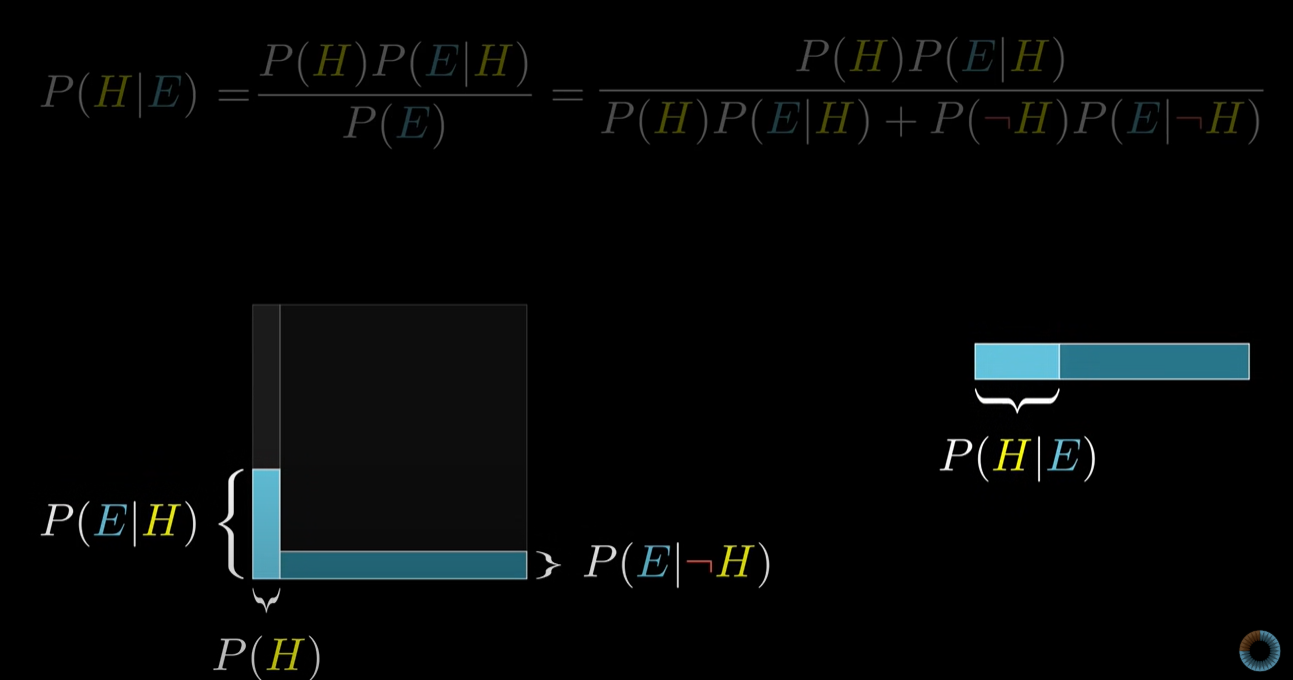

This drawing can be experimented interactively by everyone here: https://www.skobelevs.ie/BayesTheorem/. What it does is that this "rectangle type drawing" divides the world in two and then applies the likelihood of either scenario to get an answer to the question. 

To come back to the intro question, the answer depends on the general proportion of the population that has had COVID-19. In France, at the time of writing, there had been 160,000 confirmed cases (source: [Our World In Data](https://ourworldindata.org/coronavirus/country/france?country=~FRA)).
This would bring the ratio of cases to total population to:

In [1]:
print(f"{160000 / 67000000 * 100:.2f} %")

0.24 %


However, if I multiply this by ten to account for the fact that confirmed cases are less than total cases, I get an order of magnitude of 2.4 %. Inputting this in the interactive Bayes's theorem, I get the following:

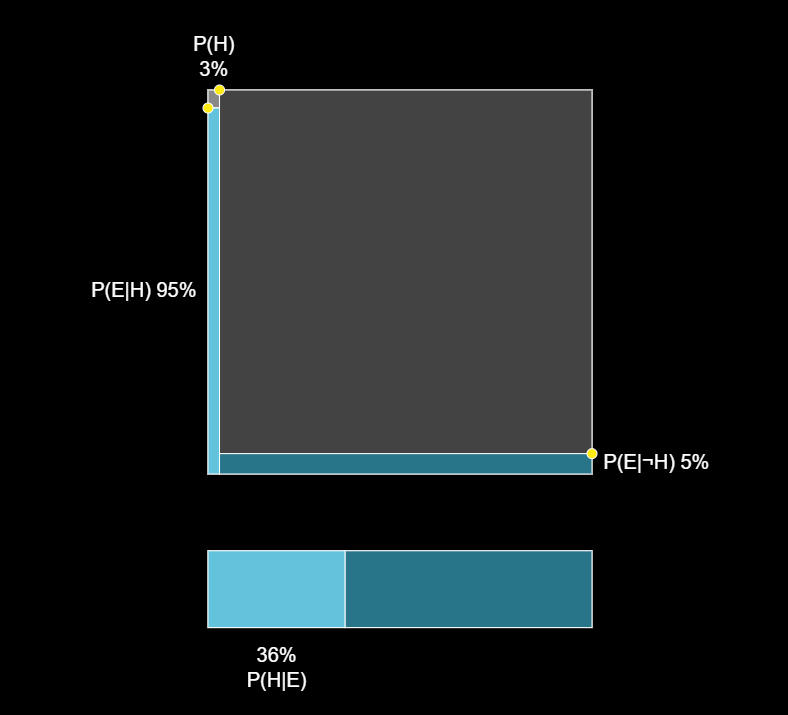

In the above diagram, we have:

> H(ypothesis): I have antibodies
>
>not H: I don't have antibodies
>
>E(vidence): my test is positive
>
>and "|" is read as "given".

Admittedly, I expected the probability to be much higher than 36% (I wrote to my friend I believed it to be 90%!). But it makes intuitive sense: when most of the population has not had a disease, the rate of false alarms is 5% of many more people compared to 95% of just a few.

Going down the path of Bayes's theorem, I realized what many people have realized before me: you can spot many situations in real life where it applies. I'll post the [obligatory XKCD](https://xkcd.com/2236/) about this here:

![xkcd 2236](https://imgs.xkcd.com/comics/is_it_christmas.png)

You might wonder what makes this comic interesting or connected to Bayes's theorem. I'll try to rephrase it. When we see a 99.73% accuracy, we are usually led to believe something works really well. That is not necessarily true and is particularly false in this case. 

Where does the 99.73% accuracy come from? Supposing the service always says no, it will be correct 364 out of 365 days every year. What accuracy would that give?

In [2]:
print(f"{364/365 * 100:.2f}%")

99.73%


So the diagram that represents this situation is:

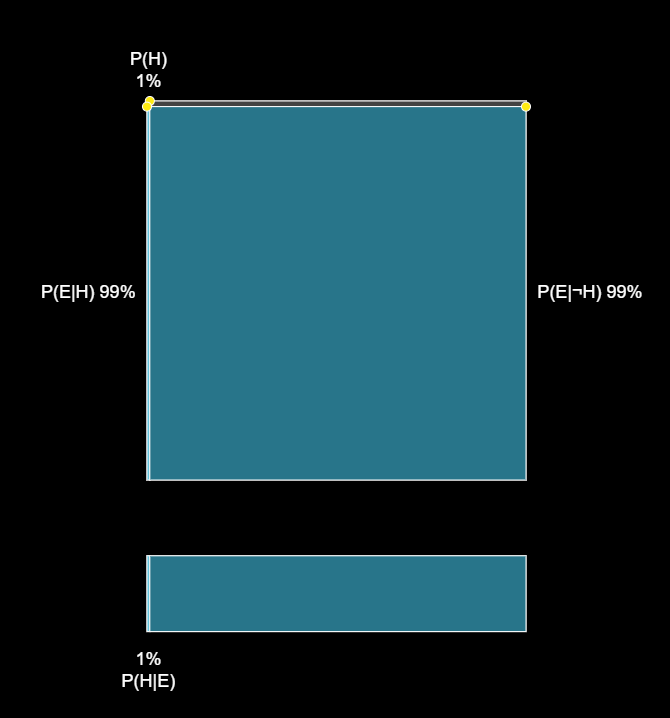

With:

> H(ypothesis): it is Christmas
>
> not H: it is not Christmas
>
> p(E|H) = 99%
> p(E|not H) = 99%

For very rare events, an accuracy as high as 99.73% does not mean it *works*. Regarding the "Is it christmas service", answering No works almost all the time. In that case, applying Bayes's theorem tells us that this information is not actually useful (see also the discussion at [explainxkcd](https://www.explainxkcd.com/wiki/index.php/2236)).

# Allen Downey's book *Think Bayes* and the audience problem 

Since I'm now quite interested in the topic, I invested some time in the first chapters of [Think Bayes](https://greenteapress.com/wp/think-bayes/), a *free* book by Allen Downey. It introduces all the necessary tools to solve problems using the Bayesian framework (and Python). The included exercices are well worth studying. To give you a feeling for what it is like, I'll solve one of the exercices in Chapter 4, which made me scratch my head but is quite fun.

## The audience problem 

For lack of a better name, I'll call it the *audience problem*.

> Suppose you are giving a talk in a large lecture hall and you want to estimate the number of people in the audience.  There are too many to count, so you ask how many people were born on May 11 and two people raise their hands.  You ask how many were born on May 23 and 1 person raises their hand.  Finally, you ask how many were born on August 1, and no one raises their hand.
>
>How many people are in the audience?  What is the 90% credible interval for your estimate?  
>
>Hint: Remember the binomial distribution.


## Birthdays and the binomial 

Let's start with the hint. Given a room full of $N$ people, what is the likelihood that there are $k$ people having shared birthdays in the room? Although related, this is not the [Birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem).

However, this is a little bit like doing *biased* coin flips. For a given date, for each person, there is a 1/365 chance to be born on a chosen date and 364/365 chances to be born on a different date. Of course, this is not completely true. [Wikipedia says this](https://en.m.wikipedia.org/wiki/Birthday#Distribution_through_the_year):

> According to a public database of births, birthdays in the United States are quite evenly distributed for the most part, but there tend to be more births in September and October.

Still, we can now use the binomial distribution to model the likelihood of seeing $k$ people out of a group of $N$ being born on the same day. Let's print out some examples:

In [3]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
plt.style.use('bmh')

def likelihood(simultaneous_birthdays, n_people):
    return binom.pmf(simultaneous_birthdays, n_people, 1/365)

for n_people in [10, 100, 1000, 5000]:
    print(f"probability of having 2 same birthdays in a group of {n_people} people: {likelihood(2, n_people)}")

probability of having 2 same birthdays in a group of 10 people: 0.0003304417689522596
probability of having 2 same birthdays in a group of 100 people: 0.028395815838883412
probability of having 2 same birthdays in a group of 1000 people: 0.24257828306055515
probability of having 2 same birthdays in a group of 5000 people: 0.00010404383244978125


An interesting thing showing up in these numerical values is that for a fixed number of people having a birthday on the same date, the probability rises the larger the group and then goes down again. This can be understood by graphing the probability of seing $k$ people sharing a birthday for a group of 10000 people:

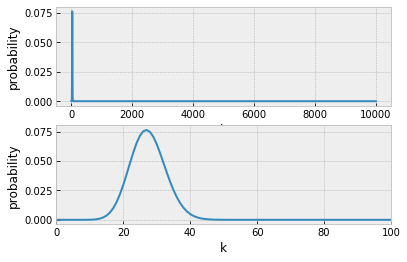

In [4]:
k = np.arange(0, 10001)
probs = likelihood(k, 10000)

fig, (ax1, ax2)= plt.subplots(nrows=2)
ax1.plot(k, probs)
ax2.plot(k, probs)
ax2.set_xlim(0, 100)
for ax in [ax1, ax2]:
    ax.set_xlabel('k')
    ax.set_ylabel('probability')

It appears that the number of birthdays is most probable for the expected value of $1/365 \times N$. Hence, when increasing the number of people in the room from 10 to 5000, we pass this bump in the process.

## Solution to the audience problem 

Now on to the solution of the problem. We setup a world of all possible room sizes called `hypos`.

In [5]:
from empiricaldist import Pmf

hypos = np.arange(1, 2000) # let's say there are at maximium 2000 people in the room

pmf = Pmf(1, hypos) # each hypothesis has the same probability at first (hence the 1)

pmf.normalize() # normalize the distribution

1999

We can now write the update function that allows us to process new evidence, of which we have three (2 people born on the same day, 1 on the same day, 0 on the same day).

In [6]:
def update_prior(pmf, simultaneous_birthdays_observed):
    """Updates the pmf with the posterior likelihood of `simultaneous_birthdays_observed`."""
    l = likelihood(simultaneous_birthdays_observed, pmf.qs)
    l[pmf.qs < simultaneous_birthdays_observed] = 0
    pmf *= l
    pmf.normalize()

Let's now proceed step by step and see how the different evidences modify our beliefs.

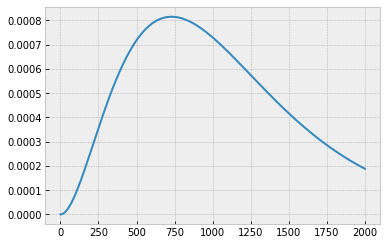

In [7]:
update_prior(pmf, 2)

pmf.plot()

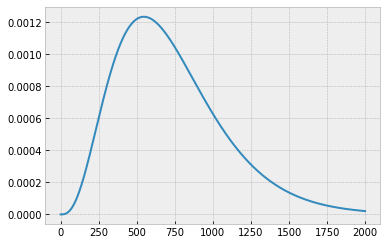

In [8]:
update_prior(pmf, 1)

pmf.plot()

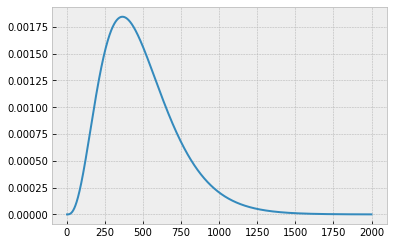

In [9]:
update_prior(pmf, 0)

pmf.plot()

This yields the solution to our problem. What is the most probable room size?

In [10]:
pmf.max_prob()

365

And what is the 95% credible region?

In [11]:
pmf.credible_interval(0.95)

array([ 133., 1065.])

Let's put all this together to draw a complete graph:

first update [ 218. 1880.]
second update [ 199. 1551.]
third update [ 133. 1065.]


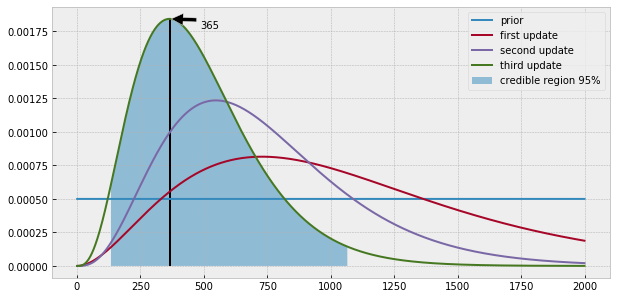

In [12]:
hypos = np.arange(1, 2000)
pmf = Pmf(1, hypos)
pmf.normalize()

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(pmf.qs, pmf.ps, label='prior')

update_prior(pmf, 2)
print("first update", pmf.credible_interval(.95))

ax.plot(pmf.qs, pmf.ps, label='first update')

update_prior(pmf, 1)
print("second update", pmf.credible_interval(.95))

ax.plot(pmf.qs, pmf.ps, label='second update')

update_prior(pmf, 0)
print("third update", pmf.credible_interval(.95))

ax.plot(pmf.qs, pmf.ps, label='third update')



ax.vlines(pmf.max_prob(), 0, pmf[pmf.max_prob()])

mini, maxi = pmf.credible_interval(.95)
sel = (pmf.qs > mini) & (pmf.qs <= maxi)
ax.fill_between(pmf.qs[sel], pmf.ps[sel], alpha=0.5, label='credible region 95%')
ax.annotate(xy=(pmf.max_prob(), pmf.ps[pmf.max_prob()]), s=f"{pmf.max_prob()}",
            xytext=(0.3, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.legend();

As you can see in the above plot having two birthdays observed shapes the posterior to center on 730 people, then observing one birthday moves it towards 365 and finally seeing zero born on another date shifts it towards 0. All things done, we end up with a most likely number of 365 people in the room.

## Analytical solution 

As my friend Anders has pointed out, there also exists an analytical solution to this problem. It works as follows: suppose the number of people in the room is N. What is the probability of observing 2, 1 and 0 conjoint birthdays? Since the events are independent, it is a multiplication of their likelihoods.

In [13]:
import sympy as sp

n = sp.Symbol('n', integer=True, positive=True)
p = sp.Symbol('p', positive=True)

def likelihood_sympy(simultaneous_birthdays, n_people, p):
    return sp.binomial(n_people, simultaneous_birthdays) * p ** simultaneous_birthdays * (1 - p) ** (n_people - simultaneous_birthdays) 

l = likelihood_sympy(2, n, p) * likelihood_sympy(1, n, p) * likelihood_sympy(0, n, p) 

l = sp.simplify(l)

l

n**2*p**3*(1 - p)**(3*n - 3)*(n - 1)/2

In [14]:
sols = sp.solve(sp.Eq(l.diff(n), 0))
sols 

[{n: (-sqrt(9*log(1 - p)**2 + 6*log(1 - p) + 9)/6 + log(1 - p)/2 - 1/2)/log(1 - p)},
 {n: (sqrt(9*log(1 - p)**2 + 6*log(1 - p) + 9)/6 + log(1 - p)/2 - 1/2)/log(1 - p)}]

In [15]:
sols[0][n]

(-sqrt(9*log(1 - p)**2 + 6*log(1 - p) + 9)/6 + log(1 - p)/2 - 1/2)/log(1 - p)

In [16]:
sols[0][n].subs({p:1/365})

364.833714930100

This is very close to our previous best estimate!

We can plot this expression to see how close the numerical results are (using an appropriate normalization). 

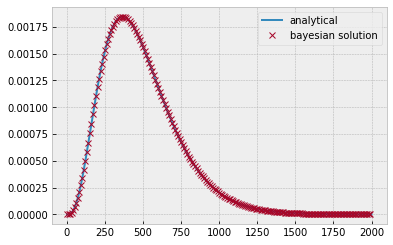

In [17]:
vals = sp.lambdify(n, l.subs({p:1/365}))(hypos) 


fig, ax = plt.subplots()
ax.plot(hypos, vals / vals.max() * pmf.max(), label='analytical')
ax.plot(pmf.qs[::10], pmf.ps[::10], 'x', label='bayesian solution')
ax.legend();

Indeed things seem to be pretty close. Let's see how close.

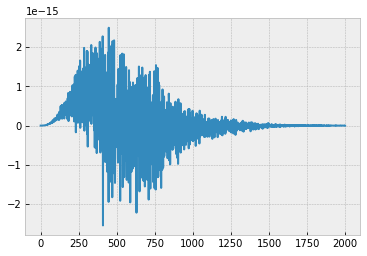

In [18]:
delta = pmf.ps - vals / vals.max() * pmf.max()

fig, ax = plt.subplots()
ax.plot(pmf.qs, delta)

This is very small. 

So it seems that the two ways of solving the problem are very similar. However, there are differences. In particular, in the Bayesian method, we set the probability of seeing rooms larger than 2000 people to zero. It turns out that this doesn't seem to have an effect compared to the analytical solution.

The analytical solution gives the impression that things are continuous in the number of people in the room (indeed, of could it be that 364.83 people fit in a room?), whereas the bayesian method restricts itself to a discrete setting (more appropriate in this case).

Also, the analytical method didn't mention a prior. Is that a good or a bad thing? Well, it turns out that we implicitly used a prior in the analytical method, even though we didn't notice it. So I would argue it is a bad thing. 

# Conclusion

I hope you've like this little introduction to Bayesian statistics in times of the Coronavirus. If you're interested in this topic, I suggest you read Allen Downey's book, *Think Bayes* or follow him on Twitter.

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Tuesday is Bayes Day! And that means it&#39;s time for a new chapter from the in-progress second edition of Think Bayes: <a href="https://t.co/hHX6Ze3jgK">https://t.co/hHX6Ze3jgK</a><br><br>I think the exercises in this chapter are particularly good. I&#39;ll post solutions later this week.</p>&mdash; Allen Downey (@AllenDowney) <a href="https://twitter.com/AllenDowney/status/1272897398206091265?ref_src=twsrc%5Etfw">June 16, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

*This post was entirely written using the Jupyter Notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20200624_BayesianInCoronaTimes.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20200624_BayesianInCoronaTimes.ipynb).*